 # AUTOMATIC CHORD-SCALE DETECTION & STUDENT PERFORMANCE ASSESMENT FOR JAZZ IMPROVISATION
 
 ## PART 2 : EVALUATION ON CHORD-SCALE DATASET

In [1]:
import sys,os
sys.path.append(os.path.join(os.path.dirname('__file__'), 'freesound-python/'))

import numpy as np

import freesound
client = freesound.FreesoundClient()
client.set_token("1Dio5sf5Kq7uxPPi4WSQljr4EncEzRjuVdlMV8z8","token")

from IPython.display import Audio
from IPython.core.display import display, HTML, Image

from utilities import *

#Directory for audio files
audioDir = 'audio/'
#Directory for audio segment annotations
annotationsDir = 'scale_annotations/'
#Directory for Feature Data (.csv and pickle files)
dataDir = 'data/'

#ANALYSIS PARAMETERS FOR FEATURE EXTRACTION

params=AnalysisParams(200,100,'hann',2048,44100,12)

#INITIATE PROPER DATA STRUCTURE
dataDictionary = createDataStructure(annotationsDir) 

### METHOD 1 : TEMPLATE-BASED LIKELIHOOD ESTIMATION


In [2]:
### FIRST, LET'S DEFINE A DICTIONARY THAT CONTAINS ALL THE PREDEFINED SCALE TEMPLATES

ScaleTemplates = dict()
    
ScaleTemplates['major'] = {'scaleArray':[1,0,1,0,1,1,0,1,0,1,0,1]}
ScaleTemplates['dorian'] = {'scaleArray':[1,0,1,1,0,1,0,1,0,1,1,0]}
ScaleTemplates['phrygian'] = {'scaleArray':[1,1,0,1,0,1,0,1,1,0,1,0]}
ScaleTemplates['lydian'] = {'scaleArray':[1,0,1,0,1,0,1,1,0,1,0,1]}
ScaleTemplates['mixolydian'] = {'scaleArray':[1,0,1,0,1,1,0,1,0,1,1,0]}
ScaleTemplates['minor'] = {'scaleArray':[1,0,1,1,0,1,0,1,1,0,1,0]}
ScaleTemplates['locrian'] = {'scaleArray':[1,1,0,1,0,1,1,0,1,0,1,0]}
ScaleTemplates['lydianb7'] = {'scaleArray':[1,0,1,0,1,0,1,1,0,1,1,0]}
ScaleTemplates['altered'] = {'scaleArray':[1,1,0,1,1,0,1,0,1,0,1,0]}
ScaleTemplates['melmin'] = {'scaleArray':[1,0,1,1,0,1,0,1,0,1,0,1]}
ScaleTemplates['hminor'] = {'scaleArray':[1,0,1,1,0,1,0,1,1,0,0,1]}
ScaleTemplates['hwdiminished'] = {'scaleArray':[1,1,0,1,1,0,1,1,0,1,1,0]}

#### a) HARMONIC PITCH CLASS PROFILES

Maximum Likeliest Scale of Phrase : phrygian


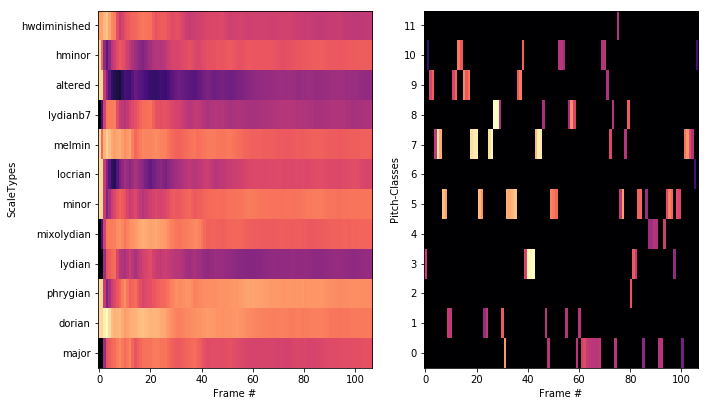

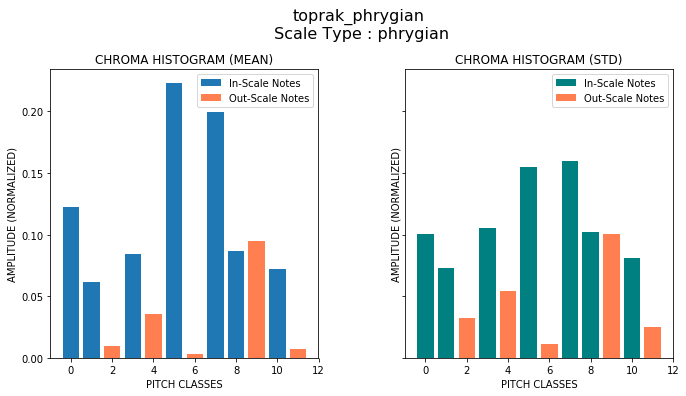

In [3]:
### NOW, LET'S LOAD THE FEATURE DATA WE OBTAINED IN THE PREVIOUS STEPmaxlikelihood2

FEATURES = 'HPCP'

FEATUREDATA = os.path.join('data',FEATURES + 'FeaturesExtracted_ChordScaleDataset.pkl')
with open(FEATUREDATA , 'rb') as f:
    dataDictionary = pickle.load(f)
    
### CHOOSE THE SOUND

SAMPLESOUND = 'toprak_phrygian'

### CHOOSE THE AUDIO SEGMENT FOR ANALYSIS

NUMSegment = 2

FileData = dataDictionary[SAMPLESOUND][NUMSegment]

ScaleTemplate = ScaleTemplates[FileData['groundtruth']['scaleType'].split(':')[1]]['scaleArray']    


### and THE CHORD-SCALE ESTIMATION METHOD; 1 - Multiplicative, 2 - Additive 

LikelihoodMethod = 2

VisualizeChromaANDScaleLikelihoods(FileData,ScaleTemplates,LikelihoodMethod, FEATURES)

plotChromaHistograms(FileData,ScaleTemplate)

Scale Likelihood Estimation on the Chord-Scale Dataset with 12 class types : 

Likelihood Method : 
Multiplicative (Weiss, 2014)
Features Used :  mean
F measure (weighted) :  
71.2591680089 %
Overall Accuracy : 
71.186440678 %
Confusion matrix, without normalization


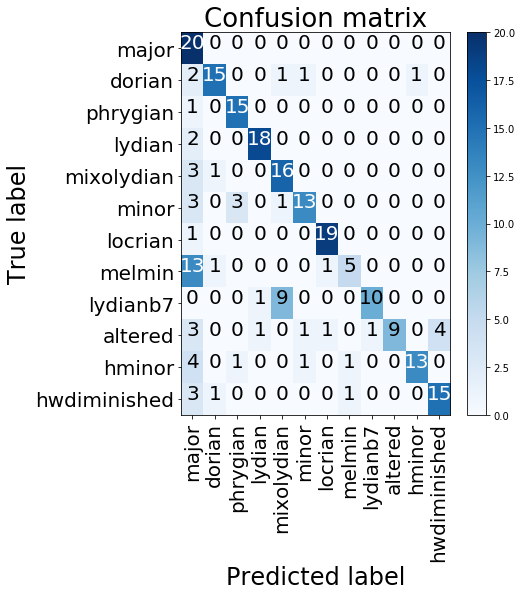

Scale Likelihood Estimation on the Chord-Scale Dataset with 12 class types : 

Likelihood Method : 
Additive method
Features Used :  mean
F measure (weighted) :  
77.7966093068 %
Overall Accuracy : 
78.3898305085 %
Confusion matrix, without normalization


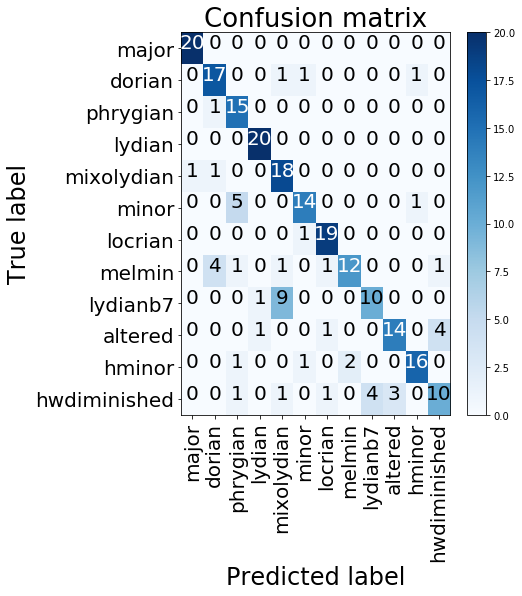

Scale Likelihood Estimation on the Chord-Scale Dataset with 12 class types : 

Likelihood Method : 
Multiplicative (Weiss, 2014)
Features Used :  std
F measure (weighted) :  
70.1737502228 %
Overall Accuracy : 
70.3389830508 %
Confusion matrix, without normalization


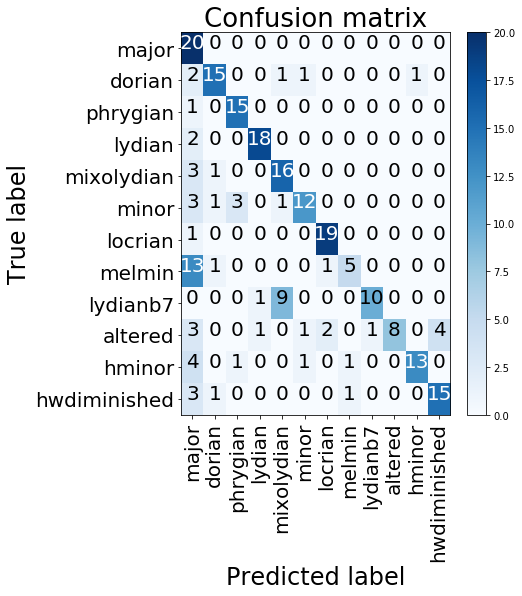

Scale Likelihood Estimation on the Chord-Scale Dataset with 12 class types : 

Likelihood Method : 
Additive method
Features Used :  std
F measure (weighted) :  
77.1175436251 %
Overall Accuracy : 
77.9661016949 %
Confusion matrix, without normalization


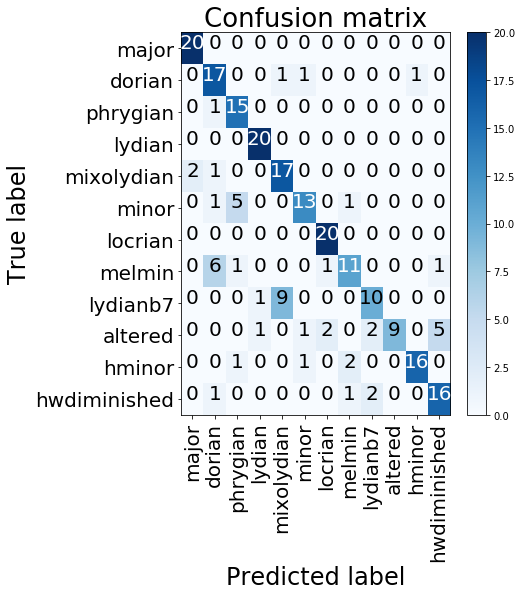

In [4]:
features = ['mean','std']
LikelihoodMethods = [1,2] ### 1 - Weiss (2014) method (multiplicative approach), 2 - Demirel method (additive approach)

SCALETYPES = ['major','dorian','phrygian','lydian','mixolydian','minor','locrian','melmin','lydianb7','altered','hminor', 'hwdiminished']

overall_accuracy_list = []
for feature in features:
    for i in LikelihoodMethods : 
        print('Scale Likelihood Estimation on the Chord-Scale Dataset with 12 class types : \n')
        print('Likelihood Method : ')
        if i == 1:
            print('Multiplicative (Weiss, 2014)')
        if i == 2:
            print('Additive method')
        print('Features Used : ', feature)    
        Classification_Likelihood(dataDictionary,ScaleTemplates,i,FEATURES, feature)
        Evaluate_ScaleLikelihoodEstimation(dataDictionary,SCALETYPES )

#### b) NNLS CHROMA FEATURES

In [5]:
FEATURES = 'NNLS'

FEATUREDATA = os.path.join('data',FEATURES + 'FeaturesExtracted_ChordScaleDataset.pkl')
with open(FEATUREDATA , 'rb') as f:
    dataDictionary = pickle.load(f)
    
### CHOOSE THE SOUND

SAMPLESOUND = 'toprak_lydianb7'

### CHOOSE THE AUDIO SEGMENT FOR ANALYSIS

NUMSegment = 3

### and THE CHORD-SCALE ESTIMATION METHOD; 1 - Multiplicative, 2 - Additive 

LikelihoodMethod = 2

VisualizeChromaANDScaleLikelihoods(FEATUREDATA,SAMPLESOUND,NUMSegment,ScaleTemplates,LikelihoodMethod , FEATURES)

FileNotFoundError: [Errno 2] No such file or directory: 'data/NNLSFeaturesExtracted_ChordScaleDataset.pkl'

In [ ]:
features = ['mean','std']
Likelihood    plt.subplots_adjust(left=0.35, right = 0.7, wspace=0.6, top=0.05, bottom = 0.02)
Methods = [1,2] ### 1 - Weiss (2014) method (multiplicative approach), 2 - Demirel method (additive approach)

SCALETYPES = []
for part in ScaleTemplates.items():
    SCALETYPES.append(part[0])
SCALETYPES = sorted(SCALETYPES)

overall_accuracy_list = []
for feature in features:
    for i in LikelihoodMethods : 
        print('Scale Likelihood Estimation on the Chord-Scale Dataset with 12 class types : \n')
        print('Likelihood Method : ')
        if i == 1:
            print('Multiplicative (Weiss, 2014)')
        if i == 2:
            print('Additive method')
        print('Features Used : ', feature)    
        Classification_Likelihood(dataDictionary,ScaleTemplates,i,FEATURES, feature)
        Evaluate_ScaleLikelihoodEstimation(dataDictionary,SCALETYPES )

### METHOD 2 : CLASSIFICATION USING SVMS

In [ ]:
DATA_accuracy = []
DATA_fscore = []
overall_accuracy_list = []
print('This process might take a while (5-10 min) \n CROSS-VALIDATION & TRAINING ') 

FEATURESFILE = FEATURES + 'FeaturesExtracted_ChordScaleDataset.pkl'

for i in range(3):
    FeatureSelection(FEATURESFILE,dataDir,(i+1))  
    ACCURACY, F_SCORE, CONFUSION_MATRIX, LABELS = Classification_SVM('FeaturesData_ChordScaleDataset.csv',dataDir)
    DATA_accuracy.append(ACCURACY)
    overall_accuracy_list.append(np.mean(ACCURACY)*100)
    DATA_fscore.append(F_SCORE)
    plot_confusion_matrix(CONFUSION_MATRIX,SCALETYPES,normalize=False)    ### PLOT CONFUSION MATRIX ONLY FOR THE BEST PERFORMING FEATURE SET COMBINATION

plot_VIOLINPLOT(DATA_accuracy,DATA_fscore) 


In [ ]:
countScaleType = 0
countScaleEst = 0
for files, parts in dataDictionary.items():
    for part in parts:
        if part['groundtruth']['scaleType'].split(':')[1] == 'major':
            countScaleType = countScaleType + 1
print(countScaleType)        

In [ ]:
dataDictionary

In [ ]:
CONFUSION_MATRIX